In [9]:
import pandas as pd

df = pd.read_csv('./data/cholera-dataset.csv')

#pd.read_csv('data.csv')  # doctest: +SKIP

In [16]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm






In [10]:
df

,Unnamed: 0,age,sex,dh,rbp,c,seizures,vc,ga,bt0,fc,exposed_to,fever,cholera
0,0,63,Male,3,145,233.0,1,0,150,0,0,0,0,1
1,1,37,Male,2,130,250.0,0,1,187,0,0,0,0,1
2,2,41,Female,1,130,204.0,0,0,172,0,2,0,0,1
3,3,56,Male,1,120,236.0,0,1,178,0,2,0,0,1
4,4,57,Female,0,120,354.0,0,1,163,1,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,298,57,Female,0,140,NaN,0,1,123,1,1,0,0,0
299,299,45,Male,3,110,264.0,0,1,132,0,1,0,0,0
300,300,68,Male,0,144,193.0,1,1,141,0,1,2,0,0
301,301,57,Male,0,130,131.0,0,1,115,1,1,1,0,0


In [12]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
Unnamed: 0    303 non-null int64
age           303 non-null int64
sex           303 non-null object
dh            303 non-null int64
rbp           303 non-null int64
c             298 non-null float64
seizures      303 non-null int64
vc            303 non-null int64
ga            303 non-null int64
bt0           303 non-null int64
fc            303 non-null int64
exposed_to    303 non-null int64
fever         303 non-null int64
cholera       303 non-null int64
dtypes: float64(1), int64(12), object(1)
memory usage: 33.3+ KB


In [13]:
df.describe()

,Unnamed: 0,age,dh,rbp,c,seizures,vc,ga,bt0,fc,exposed_to,fever,cholera
count,303.000000,303.000000,303.000000,303.000000,298.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,151.000000,54.283828,0.966997,131.623762,246.067114,0.148515,0.528053,149.646865,0.326733,1.399340,0.729373,0.006601,0.544554
std,87.612784,9.872631,1.032052,17.538143,52.121415,0.356198,0.525860,22.905161,0.469794,0.616226,1.022606,0.081110,0.498835
min,0.000000,3.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75.500000,47.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,151.000000,55.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,226.500000,61.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,2.000000,1.000000,0.000000,1.000000
max,302.000000,100.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,2.000000,4.000000,1.000000,1.000000


In [14]:
df.corr()

,Unnamed: 0,age,dh,rbp,c,seizures,vc,ga,bt0,fc,exposed_to,fever,cholera
Unnamed: 0,1.000000,0.172207,-0.399163,0.108507,0.023497,0.000743,-0.021130,-0.404972,0.363788,-0.276484,0.384962,0.077816,-0.862585
age,0.172207,1.000000,-0.044250,0.288548,0.197710,0.115090,-0.114431,-0.337616,0.077033,-0.149863,0.254933,0.043139,-0.198234
dh,-0.399163,-0.044250,1.000000,0.047608,-0.077718,0.094444,0.044421,0.295762,-0.394280,0.119717,-0.181053,-0.036946,0.433798
rbp,0.108507,0.288548,0.047608,1.000000,0.129687,0.177531,-0.114103,-0.046698,0.067616,-0.121475,0.101389,0.015718,-0.144931
c,0.023497,0.197710,-0.077718,0.129687,1.000000,0.018558,-0.155998,-0.012734,0.073702,-0.010243,0.076732,0.009372,-0.092688
seizures,0.000743,0.115090,0.094444,0.177531,0.018558,1.000000,-0.084189,-0.008567,0.025665,-0.059894,0.137979,-0.034043,-0.028046
vc,-0.021130,-0.114431,0.044421,-0.114103,-0.155998,-0.084189,1.000000,0.044123,-0.070733,0.093045,-0.072042,-0.081989,0.137230
ga,-0.404972,-0.337616,0.295762,-0.046698,-0.012734,-0.008567,0.044123,1.000000,-0.378812,0.386784,-0.213177,0.061858,0.421741
bt0,0.363788,0.077033,-0.394280,0.067616,0.073702,0.025665,-0.070733,-0.378812,1.000000,-0.257748,0.115739,-0.056785,-0.436757
fc,-0.276484,-0.149863,0.119717,-0.121475,-0.010243,-0.059894,0.093045,0.386784,-0.257748,1.000000,-0.080155,-0.119161,0.345877


In [ ]:
import statsmodels.api as sm
X = sm.add_constant(df[all_columns])
model = sm.OLS(vehicles.CO2,X)
results = model.fit()
print(results.summary())

[Text(0.5, 0, 'Unnamed: 0'),
 Text(1.5, 0, 'age'),
 Text(2.5, 0, 'dh'),
 Text(3.5, 0, 'rbp'),
 Text(4.5, 0, 'c'),
 Text(5.5, 0, 'seizures'),
 Text(6.5, 0, 'vc'),
 Text(7.5, 0, 'ga'),
 Text(8.5, 0, 'bt0'),
 Text(9.5, 0, 'fc'),
 Text(10.5, 0, 'exposed_to'),
 Text(11.5, 0, 'fever'),
 Text(12.5, 0, 'cholera')]

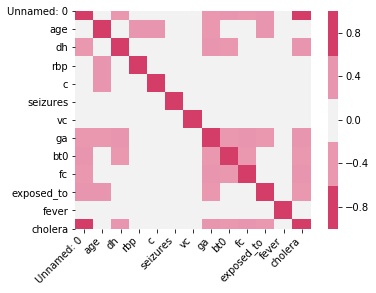

In [18]:
# your code here
#corr = df[['Age','Fare','Pclass']].corr()
corr = df.corr()



#corr = df[['Age','Fare']].corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 0, n=5), #n= is just the number of steps
    #cmap=sns.diverging_palette(80, 200, n=200), 
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)


In [24]:
df = pd.read_csv('./data/cholera-dataset.csv', index_col = 0)

In [25]:
df.shape

(303, 13)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 13 columns):
age           303 non-null int64
sex           303 non-null object
dh            303 non-null int64
rbp           303 non-null int64
c             298 non-null float64
seizures      303 non-null int64
vc            303 non-null int64
ga            303 non-null int64
bt0           303 non-null int64
fc            303 non-null int64
exposed_to    303 non-null int64
fever         303 non-null int64
cholera       303 non-null int64
dtypes: float64(1), int64(11), object(1)
memory usage: 33.1+ KB


In [27]:
df.describe()

,age,dh,rbp,c,seizures,vc,ga,bt0,fc,exposed_to,fever,cholera
count,303.000000,303.000000,303.000000,298.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.283828,0.966997,131.623762,246.067114,0.148515,0.528053,149.646865,0.326733,1.399340,0.729373,0.006601,0.544554
std,9.872631,1.032052,17.538143,52.121415,0.356198,0.525860,22.905161,0.469794,0.616226,1.022606,0.081110,0.498835
min,3.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,61.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,2.000000,1.000000,0.000000,1.000000
max,100.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,2.000000,4.000000,1.000000,1.000000


In [28]:


df.head()

,age,sex,dh,rbp,c,seizures,vc,ga,bt0,fc,exposed_to,fever,cholera
0,63,Male,3,145,233.0,1,0,150,0,0,0,0,1
1,37,Male,2,130,250.0,0,1,187,0,0,0,0,1
2,41,Female,1,130,204.0,0,0,172,0,2,0,0,1
3,56,Male,1,120,236.0,0,1,178,0,2,0,0,1
4,57,Female,0,120,354.0,0,1,163,1,2,0,0,1


In [37]:
df.query("age  3")

,age,sex,dh,rbp,c,seizures,vc,ga,bt0,fc,exposed_to,fever,cholera
198,3,Male,0,120,267.0,0,1,99,1,1,2.0,0,0


In [33]:
#df['exposed_to'] = df['exposed_to'].replace(4, np.NaN)

In [ ]:
df.dtypes


In [41]:
df.exposed_to.unique()

array([ 0.,  2.,  1.,  3., nan])

In [44]:
df.c.sort_values(ascending=False)

85     564.0
28     417.0
246    409.0
220    407.0
96     394.0
       ...  
99       NaN
134      NaN
135      NaN
260      NaN
298      NaN
Name: c, Length: 303, dtype: float64

In [47]:
df.loc[df.c > 400]
#decided that cholestrol level was immeterial - so ignoring the 564 value

,age,sex,dh,rbp,c,seizures,vc,ga,bt0,fc,exposed_to,fever,cholera
28,65,Female,2,140,417.0,1,0,157,0,2,1.0,0,1
85,67,Female,2,115,564.0,0,0,160,0,1,0.0,0,1
220,63,Female,0,150,407.0,0,0,154,0,1,3.0,0,0
246,56,Female,0,134,409.0,0,0,150,1,1,2.0,0,0


In [56]:
ds = pd.crosstab(df['sex'], df['cholera'])
ds

cholera,0,1
sex,,
Female,24,72
Male,114,93


In [58]:
df.query('mID == "A"')['hID'].agg(['nunique','count','size'])

0        Male
1        Male
2      Female
3        Male
4      Female
        ...  
298    Female
299      Male
300      Male
301      Male
302    Female
Name: sex, Length: 303, dtype: object

In [60]:
df.groupby('sex').count()


,age,dh,rbp,c,seizures,vc,ga,bt0,fc,exposed_to,fever,cholera
sex,,,,,,,,,,,,
Female,96,96,96,92,96,96,96,96,96,96,96,96
Male,207,207,207,206,207,207,207,207,207,202,207,207


Text(0.75, 0.5, 'count    303.000000\nmean      54.283828\nstd        9.872631\nmin        3.000000\n25%       47.000000\n50%       55.000000\n75%       61.000000\nmax      100.000000')

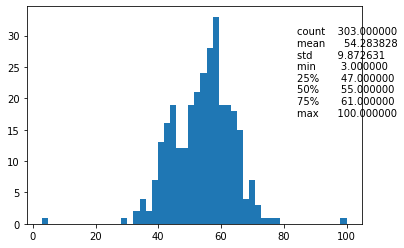

In [66]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.hist(df.age, bins = 50)
plt.figtext(0.75,0.5, df.age.describe().to_string())

In [67]:
df.loc[df.age > 90]

,age,sex,dh,rbp,c,seizures,vc,ga,bt0,fc,exposed_to,fever,cholera
247,100,Male,1,160,246.0,0,1,120,1,1,3.0,0,0


In [68]:
df.loc[df.age < 4]

,age,sex,dh,rbp,c,seizures,vc,ga,bt0,fc,exposed_to,fever,cholera
198,3,Male,0,120,267.0,0,1,99,1,1,2.0,0,0


In [69]:
df.groupby('cholera').count()

,age,sex,dh,rbp,c,seizures,vc,ga,bt0,fc,exposed_to,fever
cholera,,,,,,,,,,,,
0,138,138,138,138,136,138,138,138,138,138,137,138
1,165,165,165,165,162,165,165,165,165,165,161,165


In [ ]:
age, rbp, c, ga

Text(0.75, 0.5, 'count    303.000000\nmean     131.623762\nstd       17.538143\nmin       94.000000\n25%      120.000000\n50%      130.000000\n75%      140.000000\nmax      200.000000')

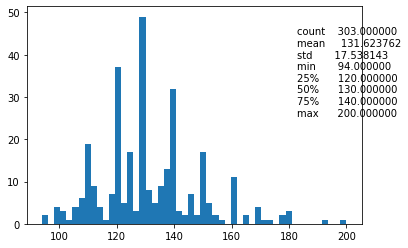

In [70]:
fig, ax = plt.subplots()
ax.hist(df.rbp, bins = 50)
plt.figtext(0.75,0.5, df.rbp.describe().to_string())

Text(0.75, 0.5, 'count    298.000000\nmean     246.067114\nstd       52.121415\nmin      126.000000\n25%      211.000000\n50%      240.000000\n75%      274.750000\nmax      564.000000')

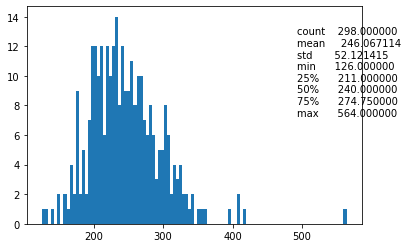

In [79]:
fig, ax = plt.subplots()
ax.hist(df.c, bins = 100)
plt.figtext(0.75,0.5, df.c.describe().to_string())

Text(0.75, 0.5, 'count    303.000000\nmean     149.646865\nstd       22.905161\nmin       71.000000\n25%      133.500000\n50%      153.000000\n75%      166.000000\nmax      202.000000')

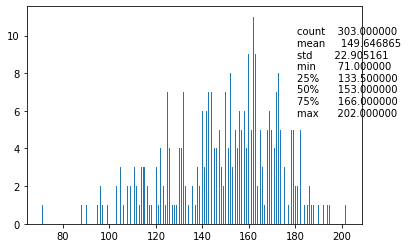

In [77]:
fig, ax = plt.subplots()
ax.hist(df.ga, bins = 300)
plt.figtext(0.75,0.5, df.ga.describe().to_string())

In [73]:
df.loc[df.ga < 80]

,age,sex,dh,rbp,c,seizures,vc,ga,bt0,fc,exposed_to,fever,cholera
272,67,Male,0,120,237.0,0,1,71,0,1,0.0,0,0


In [74]:
df.groupby('bt0').count()

,age,sex,dh,rbp,c,seizures,vc,ga,fc,exposed_to,fever,cholera
bt0,,,,,,,,,,,,
0,204,204,204,204,201,204,204,204,204,200,204,204
1,99,99,99,99,97,99,99,99,99,98,99,99


In [ ]:
age	dh	rbp	c	seizures	vc	ga	bt0	fc	exposed_to	fever	cholera

In [80]:
df.groupby('dh').count()

,age,sex,rbp,c,seizures,vc,ga,bt0,fc,exposed_to,fever,cholera
dh,,,,,,,,,,,,
0,143,143,143,140,143,143,143,143,143,142,143,143
1,50,50,50,49,50,50,50,50,50,49,50,50
2,87,87,87,86,87,87,87,87,87,84,87,87
3,23,23,23,23,23,23,23,23,23,23,23,23


In [81]:
df.groupby('seizures').count()

,age,sex,dh,rbp,c,vc,ga,bt0,fc,exposed_to,fever,cholera
seizures,,,,,,,,,,,,
0,258,258,258,258,255,258,258,258,258,254,258,258
1,45,45,45,45,43,45,45,45,45,44,45,45


In [84]:
df.groupby('exposed_to').count()

,age,sex,dh,rbp,c,seizures,vc,ga,bt0,fc,fever,cholera
exposed_to,,,,,,,,,,,,
0.0,175,175,175,175,172,175,175,175,175,175,175,175
1.0,65,65,65,65,65,65,65,65,65,65,65,65
2.0,38,38,38,38,37,38,38,38,38,38,38,38
3.0,20,20,20,20,19,20,20,20,20,20,20,20


In [85]:
df.groupby('fever').count()

,age,sex,dh,rbp,c,seizures,vc,ga,bt0,fc,exposed_to,cholera
fever,,,,,,,,,,,,
0,301,301,301,301,296,301,301,301,301,301,296,301
1,2,2,2,2,2,2,2,2,2,2,2,2


In [86]:
#only 2 people had a fever so prob not important
df.loc[df.fever == 1]

,age,sex,dh,rbp,c,seizures,vc,ga,bt0,fc,exposed_to,fever,cholera
167,62,Female,0,140,268.0,0,0,160,0,0,2.0,1,0
302,57,Female,1,130,236.0,0,0,174,0,1,1.0,1,0


In [82]:
df.groupby('fc').count()

,age,sex,dh,rbp,c,seizures,vc,ga,bt0,exposed_to,fever,cholera
fc,,,,,,,,,,,,
0,21,21,21,21,21,21,21,21,21,21,21,21
1,140,140,140,140,138,140,140,140,140,138,140,140
2,142,142,142,142,139,142,142,142,142,139,142,142


In [87]:
df.to_csv('./data/clean_df.csv')